In [5]:
import numpy as np
import pandas as ad
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [12]:
def get_mask(path):
    df = ad.read_csv("annotation_2.csv")
    
    for file in os.listdir(path):
        if file.endswith(".mhd"): 
            if float(file[:-4]) in df["seriesuid"].tolist():
                
                img = sitk.ReadImage(os.path.join(path,file))
                img = sitk.GetArrayFromImage(img)
                print(img.shape)
                mask = np.zeros_like(img)
                df_2 = df[df["seriesuid"] == float(file[:-4])]
                for i in df_2.index:
                    x, y, d =float( df_2["coordX"][i]), float(df_2["coordY"][i]), float(df_2["diameter_mm"][i])
                    xx, yy = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))
                    dist = np.sqrt((xx - x) ** 2 + (yy - y) ** 2 )
                    mask[dist <= d / 2] = 255
                mask = sitk.GetImageFromArray(mask)
                sitk.WriteImage(mask,os.path.join("D:/fin_de_etude/data/nodule_mask/nodule",file))
                
            else:
                img = sitk.ReadImage(os.path.join(path,file))
                img = sitk.GetArrayFromImage(img)
                mask = np.zeros_like(img)
                mask = sitk.GetImageFromArray(mask)
                sitk.WriteImage(mask,os.path.join("D:/fin_de_etude/data/nodule_mask/nonnodule",file))
                

In [13]:
get_mask("D:/fin_de_etude/data/dataset_2d/nodule/")
get_mask("D:/fin_de_etude/data/dataset_2d/nonnodule/")

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

In [14]:
masks= os.listdir("D:/fin_de_etude/data/nodule_mask/nodule/")
print(len(masks))
masks = masks[:40]

2306


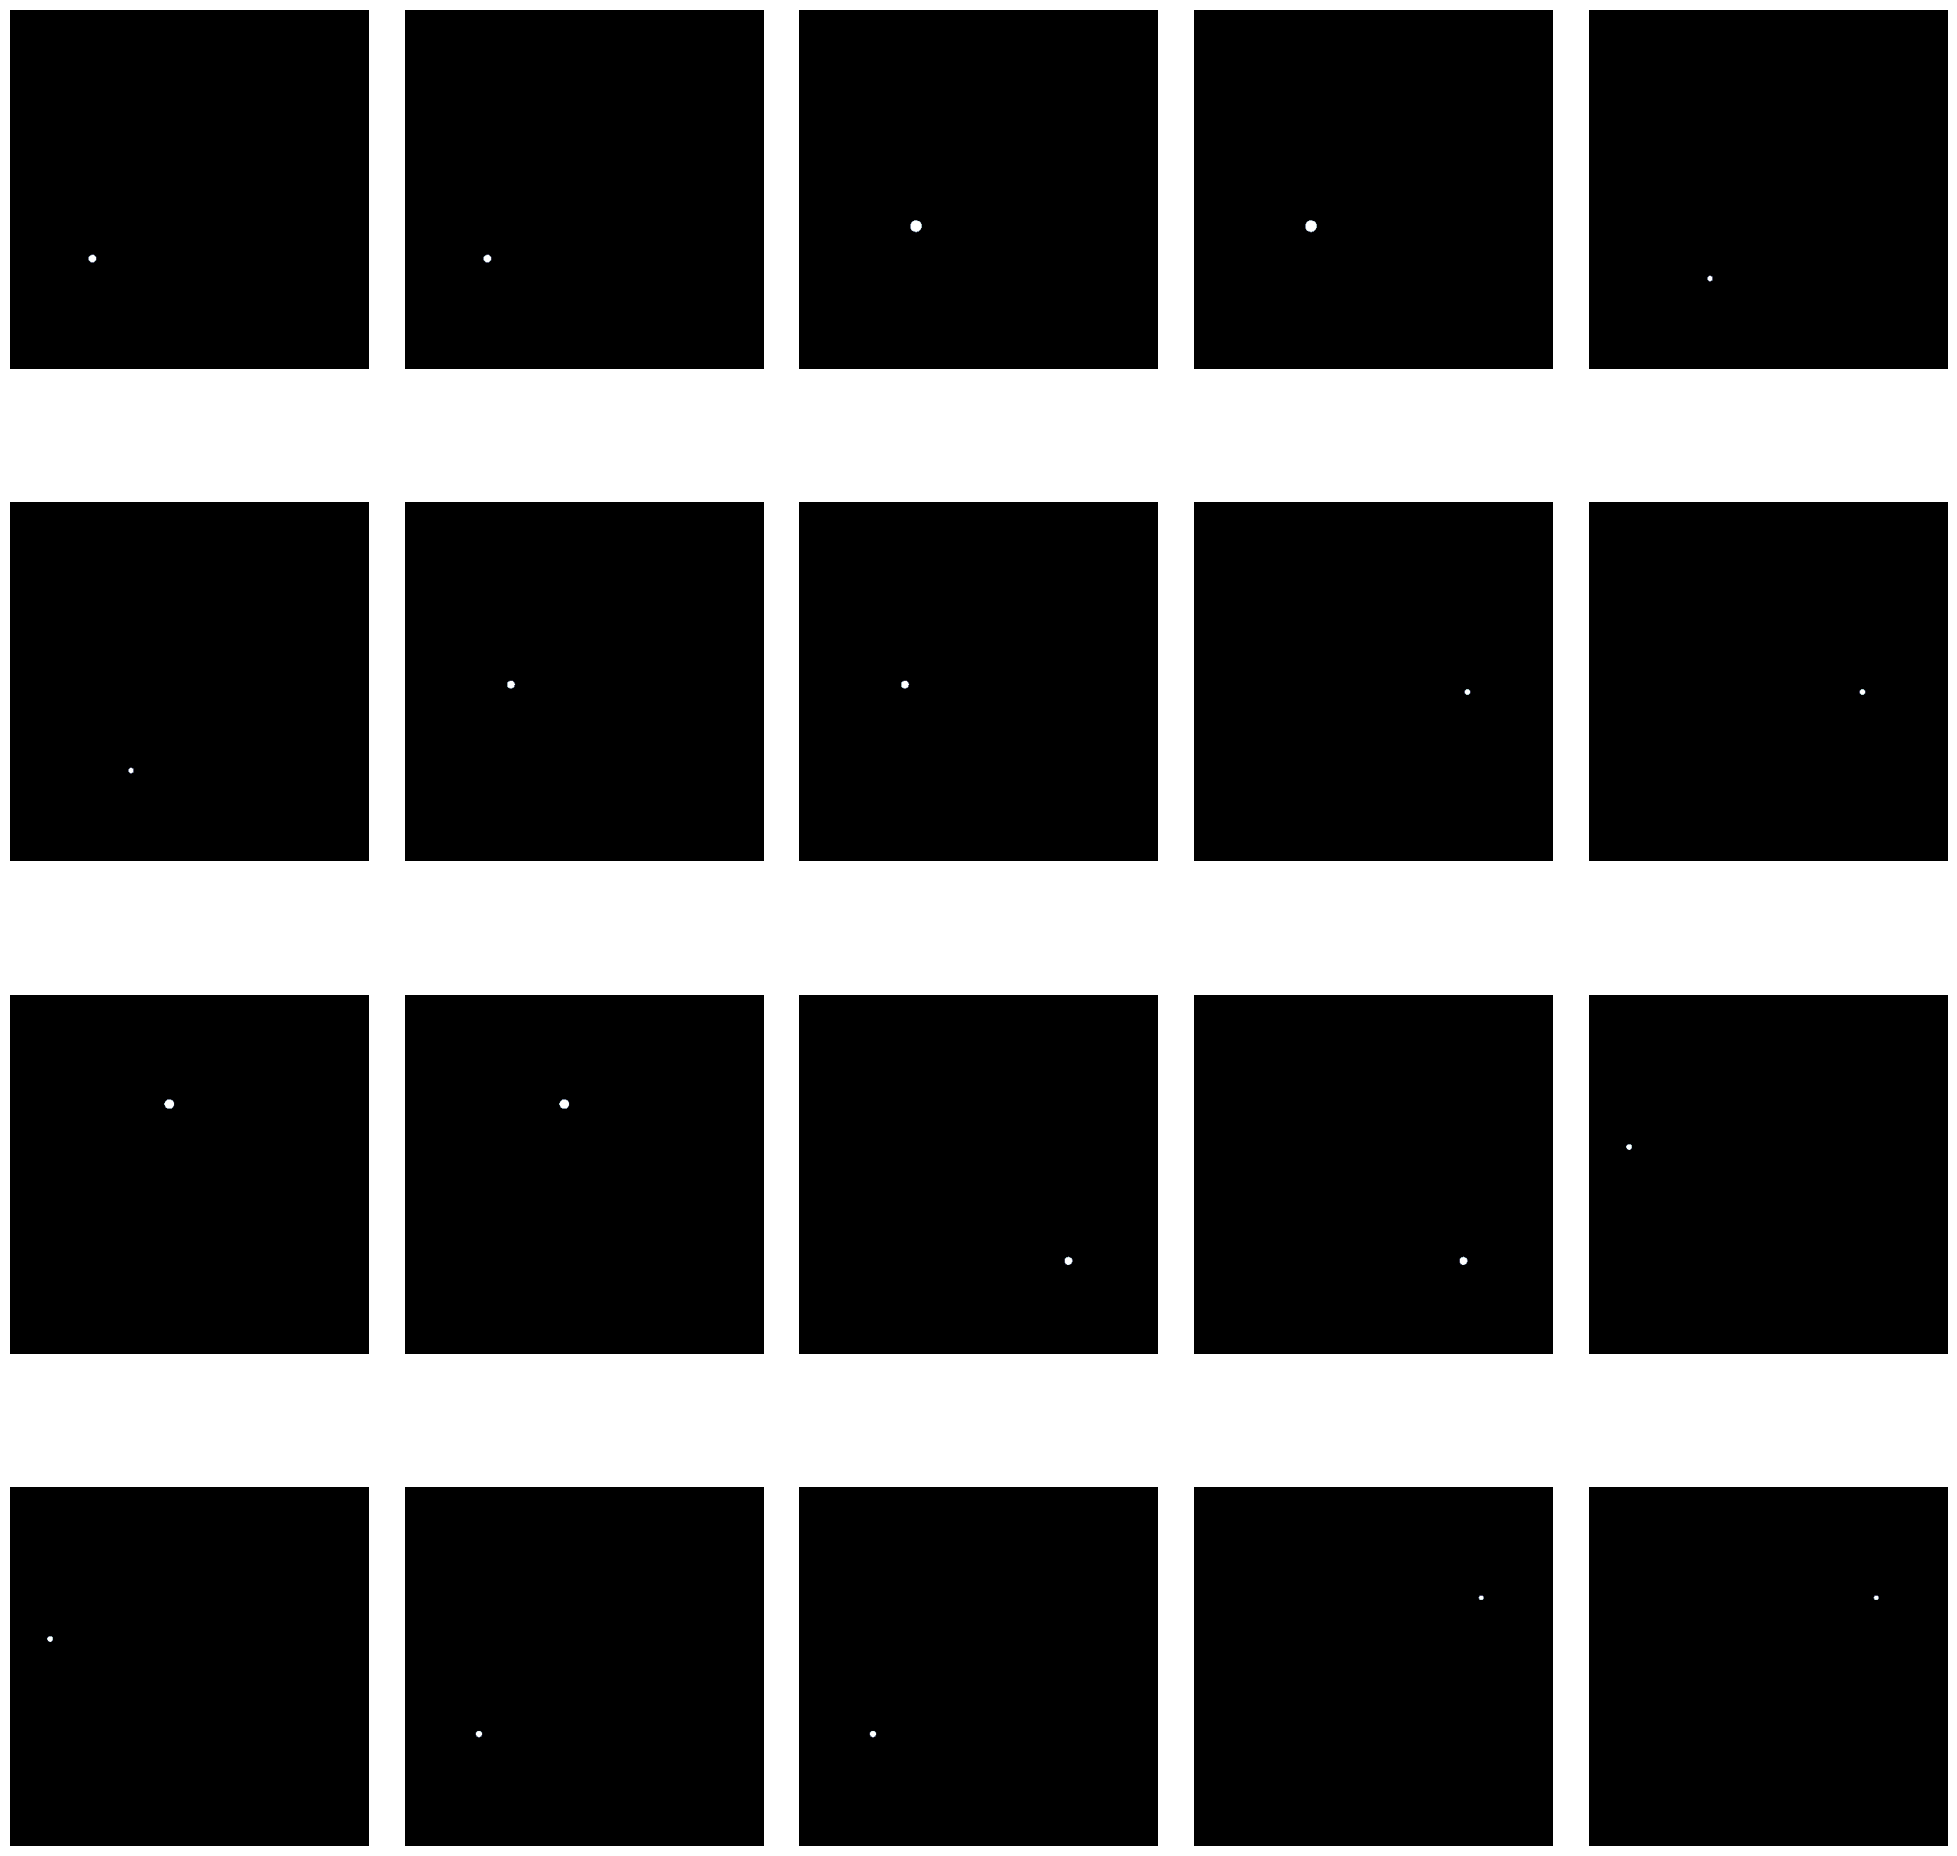

In [17]:
n_samples=len(masks)
num_cols = int(np.ceil(np.sqrt(n_samples)))
num_rows = int(np.ceil(n_samples / num_cols))
fig = plt.figure(figsize=(25, 25))
i = 0
for file in masks:
    if file.endswith(".mhd"): 
    
        img = sitk.ReadImage(os.path.join("D:/fin_de_etude/data/nodule_mask/nodule/",file))
        img = sitk.GetArrayFromImage(img)
    axs =   fig.add_subplot(
                                num_rows, num_cols,  1+i)
    axs.axis('off')
    axs.imshow(img,cmap=plt.cm.bone)
            
                
    i+=1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

        # Show the plot
plt.show()